In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import denn.utils as utils
import numpy as np

# SHO

In [6]:
# fnames = ['../../results/csvs/nlo_GAN_niters.csv', '../../results/csvs/nlo_L2_niters.csv',
#           '../../results/csvs/sho_GAN_hypertune_niters.csv', 
#           '../../results/csvs/sho_L2_hypertune_niters.csv']
sho_fnames = ['../../results/csvs/sho_GAN_niters_20reps_G64by2_D64by10.csv',
              '../../results/csvs/sho_L2_niters_20rep_64by2.csv']

In [7]:
dfs = []
for f in sho_fnames:
    dfs.append(
        pd.read_csv(f, index_col=0)
    )

In [8]:
from IPython.display import display
for d in dfs:
    display(d.head())

,mse,hypers
0,"[0.17484891414642334, 0.16073854267597198, 0.2...","{'gan_niters': 1000, 'gan_gamma': 0.999, 'disc..."
1,"[0.08091077208518982, 0.001273106667213142, 0....","{'gan_niters': 2000, 'gan_gamma': 0.999, 'disc..."
2,"[1.660758425714448e-05, 2.070787786578876e-06,...","{'gan_niters': 5000, 'gan_gamma': 0.999, 'disc..."
3,"[2.818130269588437e-06, 4.380001250581245e-09,...","{'gan_niters': 10000, 'gan_gamma': 0.999, 'dis..."
4,"[3.1628173413622562e-09, 2.5486093235826957e-0...","{'gan_niters': 20000, 'gan_gamma': 0.999, 'dis..."


,mse,hypers
0,"[0.13042812049388885, 0.06417343020439148, 0.1...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
1,"[0.03315220773220062, 0.006466000806540251, 0....","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
2,"[4.086726221430581e-06, 1.0136152468476212e-06...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
3,"[2.232506624011421e-08, 2.667156877578236e-07,...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
4,"[1.0755265122952551e-07, 4.530007657876922e-08...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."


In [9]:
for d in dfs:
    d.mse = d.mse.apply(eval) # convert string to list

In [10]:
for d in dfs:
    d['mse_top'] = d.mse.apply(lambda x: np.sort(x)[:10])

In [11]:
for d in dfs:
    d['mse_mean'] = d.mse_top.apply(np.mean)
    d['mse_std'] = d.mse_top.apply(np.std)

In [12]:
niters = [1000, 2000, 5000, 10000, 20000]

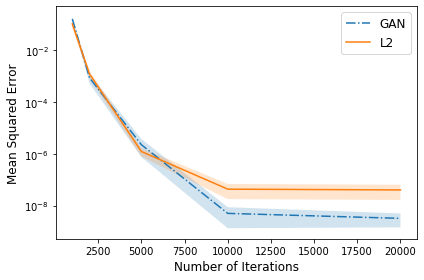

In [16]:
fig = plt.figure(figsize=(6,4))
plt.plot(niters, dfs[0].mse_mean, '-.', label='GAN')
plt.fill_between(niters, dfs[0].mse_mean - dfs[0].mse_std, dfs[0].mse_mean + dfs[0].mse_std, alpha=0.2)
plt.plot(niters, dfs[1].mse_mean, label='L2')
plt.fill_between(niters, dfs[1].mse_mean - dfs[1].mse_std, dfs[1].mse_mean + dfs[1].mse_std, alpha=0.2)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Iterations')
plt.legend(loc='upper right')
plt.yscale('log')
fig.tight_layout()
plt.savefig('../../results/imgs/sho_gan_vs_l2_niters.png')

In [17]:
newfs = ['../../results/csvs/sho_GAN_niters.csv', 
         '../../results/csvs/sho_L2_niters.csv']

In [ ]:
newdfs = []
for f in newfs:
    newdfs.append(
        pd.read_csv(f, index_col=0)
    )

In [31]:
newdfs[0].head()

,mse,hypers
0,"[0.1891838014125824, 0.20131973922252655, 0.18...","{'gan_niters': 1000, 'disc_n_hidden_units': 64..."
1,"[3.096386791412442e-08, 2.6667001051805528e-08...","{'gan_niters': 5000, 'disc_n_hidden_units': 64..."
2,"[6.0907257015685445e-09, 2.0279339096873628e-0...","{'gan_niters': 10000, 'disc_n_hidden_units': 6..."
3,"[3.267293768871582e-09, 2.8852687350422457e-08...","{'gan_niters': 20000, 'disc_n_hidden_units': 6..."
4,"[9.881341300754798e-10, 2.614183092219946e-09,...","{'gan_niters': 50000, 'disc_n_hidden_units': 6..."


In [58]:
best_run_from_list_string = lambda x: np.min(np.array(x.strip('][').split(', '), dtype=np.float))

In [60]:
min_mses = []
for df in newdfs:
    min_mses.append(
        df.mse.apply(best_run_from_list_string).tolist()
    )
    

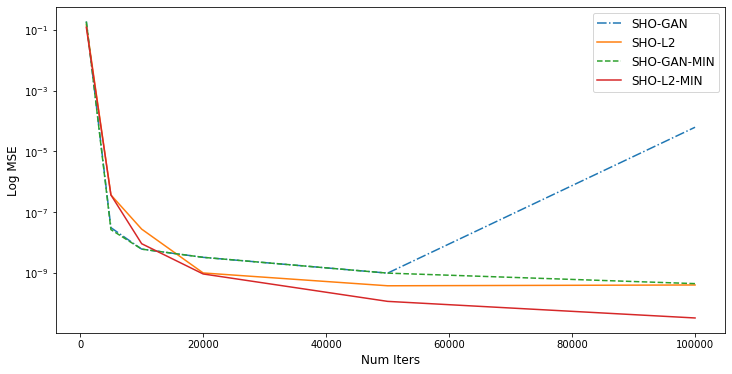

In [63]:
plt.figure(figsize=(12,6))
# plt.plot(niters, mses[0], '--', label='NLO-GAN')
# plt.plot(niters, mses[1], label='NLO-L2')
plt.plot(niters, mses[2], '-.', label='SHO-GAN')
plt.plot(niters, mses[3], label='SHO-L2')
plt.plot(niters, min_mses[0], '--', label='SHO-GAN-MIN')
plt.plot(niters, min_mses[1], label='SHO-L2-MIN')
plt.ylabel('Log MSE')
plt.xlabel('Num Iters')
plt.legend(loc='upper right')
plt.yscale('log')

# NLO

In [201]:
nlo_fnames = ['../../experiments/csvs/nlo_GAN_niters_expdecay.csv',
              '../../experiments/csvs/nlo_L2_niters_expdecay.csv']

nlo_fnames2 = ['../../experiments/csvs/nlo_GAN_niters_new_to_200k.csv',
              '../../experiments/csvs/nlo_L2_niters_new_to_200k.csv']

In [202]:
dfs = []
for f in nlo_fnames:
    dfs.append(
        pd.read_csv(f, index_col=0)
    )

In [203]:
dfs2 = []
for f in nlo_fnames2:
    dfs2.append(
        pd.read_csv(f, index_col=0)
    )

In [204]:
for i in range(2):
    dfs[i] = pd.concat((dfs[i],dfs2[i]), axis=0)

In [206]:
from IPython.display import display
for d in dfs:
    display(d)

,mse,hypers
0,"[0.7868427634239197, 0.12231526523828506, 0.12...","{'gan_niters': 10000, 'disc_n_hidden_units': 6..."
1,"[0.8178132176399231, 0.7863682508468628, 0.007...","{'gan_niters': 25000, 'disc_n_hidden_units': 6..."
2,"[0.8068164587020874, 0.8123703002929688, 0.812...","{'gan_niters': 50000, 'disc_n_hidden_units': 6..."
3,"[4.06991018664371e-09, 0.8128524422645569, 0.8...","{'gan_niters': 75000, 'disc_n_hidden_units': 6..."
4,"[0.8127744197845459, 0.8084324598312378, 0.812...","{'gan_niters': 100000, 'disc_n_hidden_units': ..."
0,"[0.8127719759941101, 4.1258454985815263e-10, 0...","{'gan_niters': 150000, 'disc_n_hidden_units': ..."
1,"[0.8085772395133972, 0.8127722144126892, 0.812...","{'gan_niters': 200000, 'disc_n_hidden_units': ..."


,mse,hypers
0,"[0.002097155898809433, 0.813778281211853, 0.82...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
1,"[0.03643536940217018, 0.036799490451812744, 0....","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
2,"[0.0008038771338760853, 0.0001589715975569561,...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
3,"[0.8127598762512207, 2.1967146324186615e-07, 0...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
4,"[7.625241664754867e-07, 3.0037595024623442e-06...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
0,"[1.7430734544632287e-07, 0.8127411603927612, 1...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."
1,"[6.612586389564967e-08, 7.680214935135155e-07,...","{'model_n_hidden_units': 64, 'model_n_hidden_l..."


In [207]:
for d in dfs:
    d.mse = d.mse.apply(eval) # convert string to list

In [208]:
for d in dfs:
    d['mse_top'] = d.mse.apply(lambda x: np.sort(x)[:3])

In [209]:
for d in dfs:
    d['mse_mean'] = d.mse_top.apply(np.mean)
    d['mse_std'] = d.mse_top.apply(np.std)

In [210]:
niters = [10000, 25000, 50000, 75000, 100000, 150000, 200000]

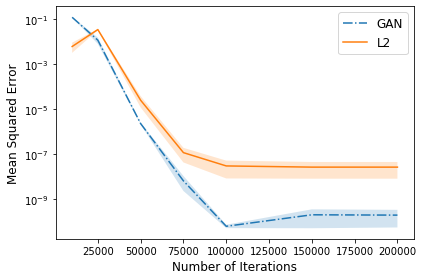

In [211]:
fig = plt.figure(figsize=(6,4))
plt.plot(niters, dfs[0].mse_mean, '-.', label='GAN')
plt.fill_between(niters, dfs[0].mse_mean - dfs[0].mse_std, dfs[0].mse_mean + dfs[0].mse_std, alpha=0.2)
plt.plot(niters, dfs[1].mse_mean, label='L2')
plt.fill_between(niters, dfs[1].mse_mean - dfs[1].mse_std, dfs[1].mse_mean + dfs[1].mse_std, alpha=0.2)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Iterations')
plt.legend(loc='upper right')
plt.yscale('log')
fig.tight_layout()
plt.savefig('../../results/imgs/nlo_gan_vs_l2_niters.png')

# Poisson

In [142]:
pos_fnames = ['../../experiments/csvs/pos_GAN_niters_new.csv',
              '../../experiments/csvs/pos_L2_niters_new.csv']

pos_fnames2 = ['../../experiments/csvs/pos_GAN_niters_1k2k.csv',
               '../../experiments/csvs/pos_L2_niters_1k2k.csv']

# pos_fnames = ['../../denn/gan_pos_niters.csv',
#               '../../denn/l2_pos_niters.csv']

In [143]:
dfs1 = []
for f in pos_fnames:
    dfs1.append(
        pd.read_csv(f, index_col=0)
    )

In [144]:
dfs2 = []
for f in pos_fnames2:
    dfs2.append(
        pd.read_csv(f, index_col=0)
    )

In [146]:
dfs = []
for d1, d2 in zip(dfs1, dfs2):
    dfs.append(pd.concat((d1,d2), axis=0))

In [147]:
from IPython.display import display
for d in dfs:
    display(d)

,mse,hypers
0,"[0.07833447307348251, 0.08658941835165024, 0.0...","{'gan_niters': 10, 'disc_n_hidden_units': 64, ..."
1,"[0.04386673867702484, 0.041368577629327774, 0....","{'gan_niters': 25, 'disc_n_hidden_units': 64, ..."
2,"[0.022996261715888977, 0.024573713541030884, 0...","{'gan_niters': 50, 'disc_n_hidden_units': 64, ..."
3,"[0.0239004734903574, 0.014714064076542854, 0.0...","{'gan_niters': 75, 'disc_n_hidden_units': 64, ..."
4,"[0.009233458898961544, 0.011373691260814667, 0...","{'gan_niters': 100, 'disc_n_hidden_units': 64,..."
5,"[0.002538301981985569, 0.0022573494352400303, ...","{'gan_niters': 200, 'disc_n_hidden_units': 64,..."
6,"[0.004369404632598162, 0.0005955059896223247, ...","{'gan_niters': 500, 'disc_n_hidden_units': 64,..."
0,"[0.002432918408885598, 0.0005865090060979128, ...","{'gan_niters': 1000, 'disc_n_hidden_units': 64..."
1,"[0.0006709417211823165, 0.0009625101811252534,...","{'gan_niters': 2000, 'disc_n_hidden_units': 64..."


,mse,hypers
0,"[0.09562679380178452, 0.08719068765640259, 0.0...","{'train_niters': 10, 'model_n_hidden_units': 6..."
1,"[0.056585270911455154, 0.06184493377804756, 0....","{'train_niters': 25, 'model_n_hidden_units': 6..."
2,"[0.04506276920437813, 0.04145204648375511, 0.0...","{'train_niters': 50, 'model_n_hidden_units': 6..."
3,"[0.026102198287844658, 0.031468287110328674, 0...","{'train_niters': 75, 'model_n_hidden_units': 6..."
4,"[0.023801127448678017, 0.024172380566596985, 0...","{'train_niters': 100, 'model_n_hidden_units': ..."
5,"[0.01664985902607441, 0.009015422314405441, 0....","{'train_niters': 200, 'model_n_hidden_units': ..."
6,"[0.005038523580878973, 0.006049716379493475, 0...","{'train_niters': 500, 'model_n_hidden_units': ..."
0,"[0.004639558028429747, 0.006097973324358463, 0...","{'train_niters': 1000, 'model_n_hidden_units':..."
1,"[0.004099401645362377, 0.007195781916379929, 0...","{'train_niters': 2000, 'model_n_hidden_units':..."


In [148]:
dfs[0].to_csv('../../experiments/csvs/pos_GAN_niters_new_joined.csv')
dfs[1].to_csv('../../experiments/csvs/pos_L2_niters_new_joined.csv')

In [149]:
for d in dfs:
    d.mse = d.mse.apply(eval) # convert string to list

In [150]:
for d in dfs:
    d['mse_top'] = d.mse.apply(lambda x: np.sort(x)[:10])

In [151]:
for d in dfs:
    d['mse_mean'] = d.mse_top.apply(np.mean)
    d['mse_std'] = d.mse_top.apply(np.std)

In [152]:
niters = [10, 25, 50, 75, 100,  200, 500, 1000, 2000]
# niters = [10, 20, 50, 100, 200, 500, 1000]

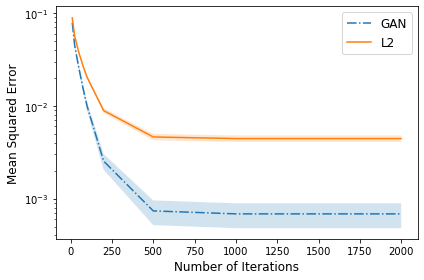

In [153]:
fig = plt.figure(figsize=(6,4))
plt.plot(niters, dfs[0].mse_mean, '-.', label='GAN')
plt.fill_between(niters, dfs[0].mse_mean - dfs[0].mse_std, dfs[0].mse_mean + dfs[0].mse_std, alpha=0.2)
plt.plot(niters, dfs[1].mse_mean, label='L2')
plt.fill_between(niters, dfs[1].mse_mean - dfs[1].mse_std, dfs[1].mse_mean + dfs[1].mse_std, alpha=0.2)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Iterations')
plt.legend(loc='upper right')
plt.yscale('log')
fig.tight_layout()
plt.savefig('../../results/imgs/pos_gan_vs_l2_niters.png')

# EXP

In [154]:
gan_reps = np.load('../exp/gan_exp_niters.npy')

In [168]:
gan_reps[:,-1]

array([2.75018702e-15, 2.38605708e-07, 4.42833010e-12, 3.13268664e-08,
       4.21394546e-08, 2.03433520e-11, 2.98814218e-16, 3.24863969e-14,
       9.72096709e-12, 2.98814218e-16, 2.76818637e-11, 6.93196238e-12,
       2.98814218e-16, 4.40922736e-16, 2.98814218e-16, 2.82328501e-12,
       6.77342297e-12, 1.04142632e-10, 3.61279305e-14, 1.91021981e-12])

In [175]:
k=10
top_k = (gan_reps[:,-1]).argsort()[:k]

In [176]:
gan_reps[:,-1][top_k]

array([2.98814218e-16, 2.98814218e-16, 2.98814218e-16, 2.98814218e-16,
       4.40922736e-16, 2.75018702e-15, 3.24863969e-14, 3.61279305e-14,
       1.91021981e-12, 2.82328501e-12])

In [179]:
gan_best = gan_reps[top_k,:]

In [180]:
gan_reps_mu = np.mean(gan_best, axis=0)

In [181]:
gan_reps_mu.shape

(500,)

In [182]:
gan_reps_std = np.std(gan_best, axis=0)

In [183]:
gan_reps_std.shape

(500,)

In [222]:
gan_reps_mu_trunc = gan_reps_mu[100::25]
gan_reps_std_trunc = gan_reps_std[100::25]

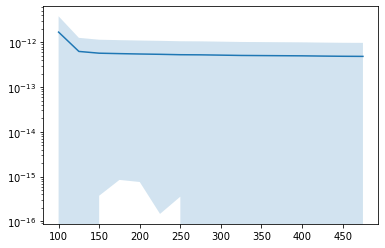

In [225]:
# niters = np.arange(len(gan_reps_mu_trunc))
niters = np.arange(100,500,25)
plt.plot(niters, gan_reps_mu_trunc)
plt.fill_between(niters, gan_reps_mu_trunc-.5*gan_reps_std_trunc, gan_reps_mu_trunc+.5*gan_reps_std_trunc, alpha=0.2)
plt.yscale('log')
# plt.ylim((1e-100, 0))